<a href="https://colab.research.google.com/github/coderlakshayjain/ds-ml-playground/blob/main/Area_Under_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUC Score: 0.904


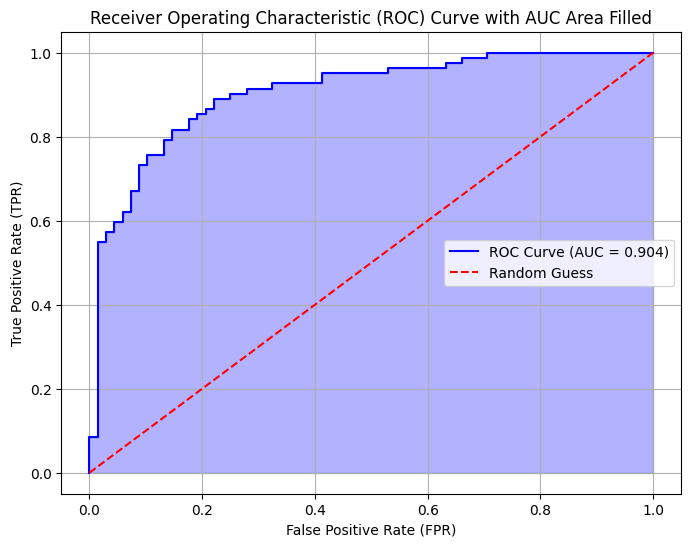

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Create a binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=2,
n_informative=5, random_state=42)

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# 5. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 6. Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.3f}")

# 7. Plot ROC curve with filled area
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')

# Fill the area under the ROC curve
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve with AUC Area Filled')
plt.legend()
plt.grid(True)
plt.show()
